In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Import Raw Data

<i>Origin: https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm

In [4]:
overdoseData = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

In [5]:
data = pd.DataFrame(overdoseData)

## Data Summary

Take a look at the data and see what kind of general information & aspects we can see. Key parts include: state, year, indicator, data value

In [6]:
data.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Number of Deaths,"4,133",100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
3,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [7]:
data.shape

(42180, 12)

## Filter & Clean up Data

Remove extra noise from the data & transform data to a point where we can start making coorelations & graphing

In [8]:
filtered1 = data[(data.Indicator == 'Number of Drug Overdose Deaths') | (data.Indicator == 'Number of Deaths')]

In [15]:
filtered1.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Number of Deaths,"4,133",100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126
2,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124,100,0.0,Alaska,Numbers may differ from published reports usin...,**,124
3,AK,2015,August,12 month-ending,Number of Deaths,"4,222",100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121,100,0.0,Alaska,Numbers may differ from published reports usin...,**,121


In [47]:
filtered1 = filtered1.reset_index(drop=True)

In [48]:
filtered2 = filtered1.drop(filtered1.columns[[3, 6, 7, 9, 10, 11]], axis=1)

In [49]:
filtered2 = filtered2.reset_index(drop=True)

In [50]:
filtered2.head()

,State,Year,Month,Indicator,Data Value,State Name
0,AK,2015,April,Number of Deaths,"4,133",Alaska
1,AK,2015,April,Number of Drug Overdose Deaths,126,Alaska
2,AK,2015,August,Number of Drug Overdose Deaths,124,Alaska
3,AK,2015,August,Number of Deaths,"4,222",Alaska
4,AK,2015,December,Number of Drug Overdose Deaths,121,Alaska


In [51]:
filtered2 = filtered2.replace(',','', regex=True)

In [52]:
filtered2['Data Value'] = filtered2['Data Value'].astype(int)

In [53]:
filtered2.head()

,State,Year,Month,Indicator,Data Value,State Name
0,AK,2015,April,Number of Deaths,4133,Alaska
1,AK,2015,April,Number of Drug Overdose Deaths,126,Alaska
2,AK,2015,August,Number of Drug Overdose Deaths,124,Alaska
3,AK,2015,August,Number of Deaths,4222,Alaska
4,AK,2015,December,Number of Drug Overdose Deaths,121,Alaska


In [54]:
filtered2['12 Month-ending Period'] = filtered2['Month'] + ' ' + filtered2['Year'].astype(str)

In [55]:
filtered2.head()

,State,Year,Month,Indicator,Data Value,State Name,12 Month-ending Period
0,AK,2015,April,Number of Deaths,4133,Alaska,April 2015
1,AK,2015,April,Number of Drug Overdose Deaths,126,Alaska,April 2015
2,AK,2015,August,Number of Drug Overdose Deaths,124,Alaska,August 2015
3,AK,2015,August,Number of Deaths,4222,Alaska,August 2015
4,AK,2015,December,Number of Drug Overdose Deaths,121,Alaska,December 2015


## Filtered by Year (all states)

In [56]:
filtered2015 = filtered2[(filtered2.Year == 2015)].reset_index(drop=True)
filtered2016 = filtered2[(filtered2.Year == 2016)].reset_index(drop=True)
filtered2017 = filtered2[(filtered2.Year == 2017)].reset_index(drop=True)
filtered2018 = filtered2[(filtered2.Year == 2018)].reset_index(drop=True)
filtered2019 = filtered2[(filtered2.Year == 2019)].reset_index(drop=True)
filtered2020 = filtered2[(filtered2.Year == 2020)].reset_index(drop=True)
filtered2021 = filtered2[(filtered2.Year == 2021)].reset_index(drop=True)

In [57]:
filtered2015.head()

,State,Year,Month,Indicator,Data Value,State Name,12 Month-ending Period
0,AK,2015,April,Number of Deaths,4133,Alaska,April 2015
1,AK,2015,April,Number of Drug Overdose Deaths,126,Alaska,April 2015
2,AK,2015,August,Number of Drug Overdose Deaths,124,Alaska,August 2015
3,AK,2015,August,Number of Deaths,4222,Alaska,August 2015
4,AK,2015,December,Number of Drug Overdose Deaths,121,Alaska,December 2015


## Filtered by Overdose Only

In [58]:
overdoseonly = filtered2[(filtered2.Indicator == 'Number of Drug Overdose Deaths')]

In [59]:
overdoseonly.head()

,State,Year,Month,Indicator,Data Value,State Name,12 Month-ending Period
1,AK,2015,April,Number of Drug Overdose Deaths,126,Alaska,April 2015
2,AK,2015,August,Number of Drug Overdose Deaths,124,Alaska,August 2015
4,AK,2015,December,Number of Drug Overdose Deaths,121,Alaska,December 2015
6,AK,2015,February,Number of Drug Overdose Deaths,127,Alaska,February 2015
9,AK,2015,January,Number of Drug Overdose Deaths,126,Alaska,January 2015


In [70]:
overdosegraphdata = overdoseonly.drop(overdoseonly.columns[[1, 2, 3, 5]], axis=1)

In [88]:
overdosegraphdata

,State,Data Value,12 Month-ending Period
1,AK,126,April 2015
2,AK,124,August 2015
4,AK,121,December 2015
6,AK,127,February 2015
9,AK,126,January 2015
...,...,...,...
8046,YC,1989,September 2020
8048,YC,2316,April 2021
8050,YC,2223,February 2021
8053,YC,2208,January 2021


## Graphing Delaware: 12 Month-ending Provisional Counts of Drug Overdose Deaths

In [73]:
overdosegraphdataDE = overdosegraphdata[(overdosegraphdata.State == 'DE')]

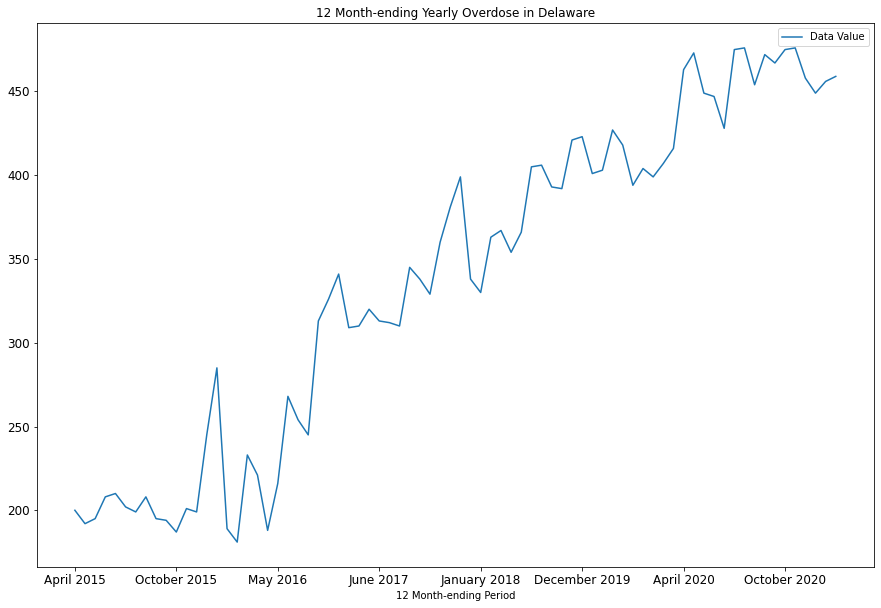

In [102]:
graph2 = overdosegraphdataDE.plot(x='12 Month-ending Period', y='Data Value', rot=0, title='12 Month-ending Yearly Overdose in Delaware', figsize=(15, 10), fontsize=12)

## Graphing US: 12 Month-ending Provisional Count of Drug Overdose Deaths

In [105]:
overdosegraphdataUS = overdosegraphdata[(overdosegraphdata.State == 'US')]

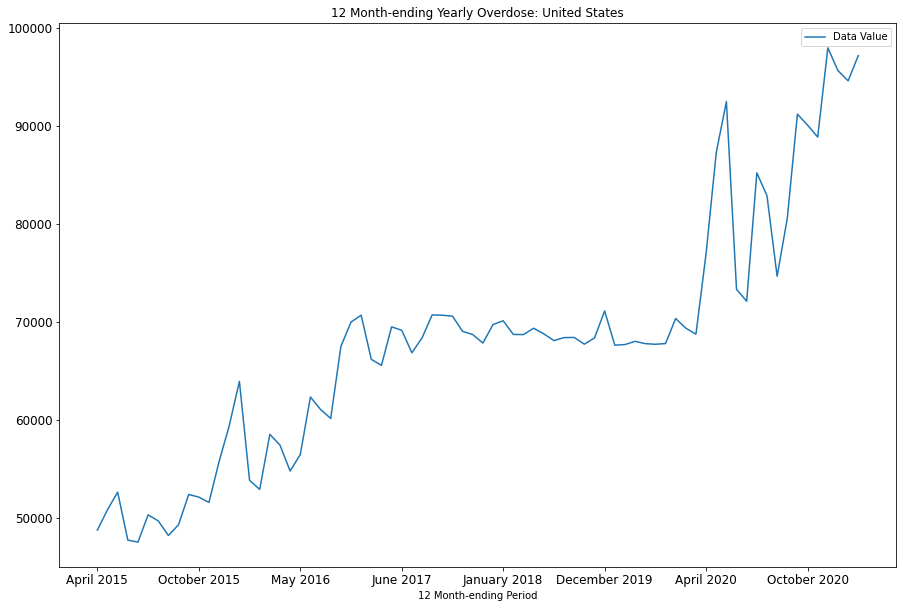

In [108]:
graph2 = overdosegraphdataUS.plot(x='12 Month-ending Period', y='Data Value', rot=0, title='12 Month-ending Yearly Overdose: United States', figsize=(15, 10), fontsize=12)

In [106]:
overdosegraphdataUS

,State,Data Value,12 Month-ending Period
6689,US,48748,April 2015
6690,US,50834,August 2015
6692,US,52623,December 2015
6694,US,47725,February 2015
6697,US,47523,January 2015
...,...,...,...
6830,US,88887,September 2020
6832,US,97990,April 2021
6834,US,95668,February 2021
6837,US,94628,January 2021


In [162]:
overdosegraphdataregion = overdosegraphdata[(overdosegraphdata.State == 'DE') | (overdosegraphdata.State == 'MD') | (overdosegraphdata.State == 'NJ') | (overdosegraphdata.State == 'PA')]

In [163]:
overdosegraphdataregion

,State,Data Value,12 Month-ending Period
1217,DE,200,April 2015
1218,DE,192,August 2015
1220,DE,195,December 2015
1222,DE,208,February 2015
1225,DE,210,January 2015
...,...,...,...
5918,PA,5149,September 2020
5920,PA,5268,April 2021
5922,PA,5296,February 2021
5925,PA,5230,January 2021


In [164]:
overdosegraphdataregion.set_index('12 Month-ending Period', inplace=True)

In [165]:
overdosegraphdataregion

,State,Data Value
12 Month-ending Period,,
April 2015,DE,200
August 2015,DE,192
December 2015,DE,195
February 2015,DE,208
January 2015,DE,210
...,...,...
September 2020,PA,5149
April 2021,PA,5268
February 2021,PA,5296


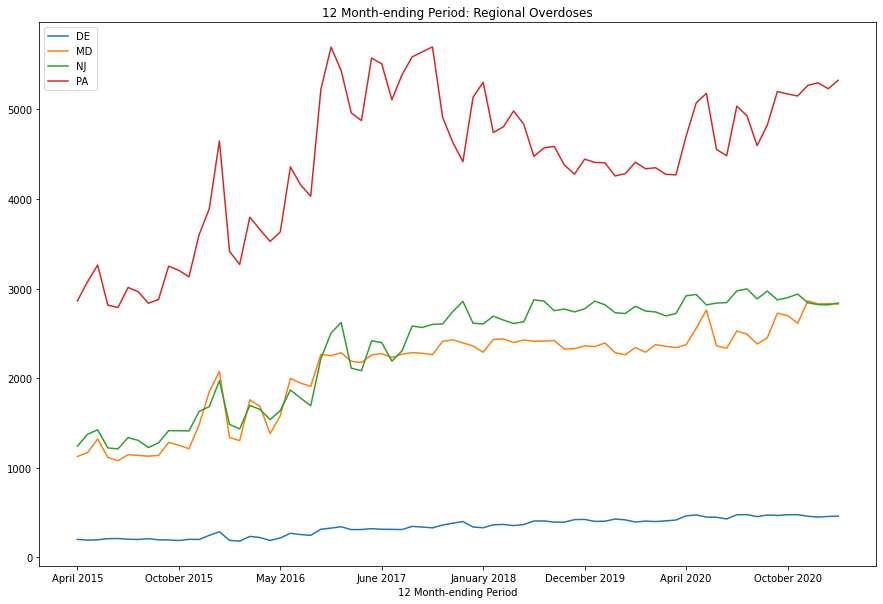

In [167]:
graph3 = overdosegraphdataregion.groupby('State')['Data Value'].plot(x='12 Month-ending Period', y='Data Value', title='12 Month-ending Period: Regional Overdoses', figsize=(15, 10), legend=True)